In [69]:
#import scipy.ndimage as spimg
import imageio
import matplotlib.pyplot as plt
import scipy.fftpack as spfft
import numpy as np
def dct2(x):
    return spfft.dct(spfft.dct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0)

def idct2(x):
    return spfft.idct(spfft.idct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0)

(300, 451, 3)
[[ 4.09927880e+04 -4.70610012e+02  2.49875805e+03 ...  1.36938253e+01
  -2.16897856e+00  2.33806223e+01]
 [-2.30369347e+03  1.76501896e+03 -1.04429029e+03 ...  1.04028840e+01
  -3.18258738e+00 -1.08419215e+01]
 [ 8.40642545e+02  1.48228304e+03  3.11350617e+02 ...  3.12454511e+00
   7.40796154e-01 -8.69934692e+00]
 ...
 [ 2.71338016e+00  2.31113444e+00 -2.43326040e+00 ... -1.22796114e+00
  -5.27644417e-01 -2.42672820e-01]
 [ 3.05305310e+00 -1.32739316e+00 -7.71760505e+00 ... -2.66034109e-02
   2.46833820e+00  1.17210848e+00]
 [-5.59042571e+00  9.16017171e+00  8.36360180e+00 ...  4.37803500e+00
  -9.88297528e-01 -5.97033192e+00]]
[ 4.09927880e+04 -4.70610012e+02  2.49875805e+03 ...  4.37803500e+00
 -9.88297528e-01 -5.97033192e+00]
1353
135300


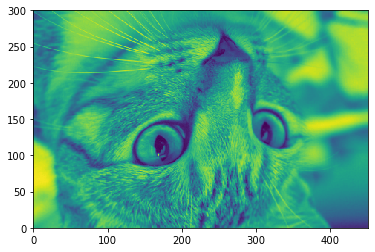

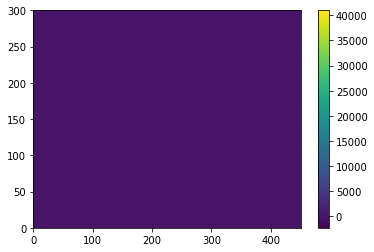

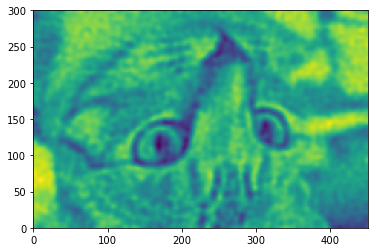

In [95]:
#Xorig = spimg.imread('escher_waterfall.jpeg', flatten=True, mode='L') # read in grayscale
im = imageio.imread('imageio:chelsea.png')
print(im.shape)

image=im[:,:,1]
fig,ax=plt.subplots()
r,c=image.shape
im=ax.pcolormesh(image)
trans=dct2(image)
fig2,ax2=plt.subplots()
im2=ax2.pcolormesh(trans)
fig2.colorbar(im2)
print(trans)
#ax2.set_xlim(-200,500)
#ax2.set_ylim(-200,500)
print(trans.flatten())
big_small=sorted(abs(trans.flatten()))[::-1]    #find all the largest coeffs (take magnitude so we can find the largest neg values as well)
#print(max(big_small))
#print(big_small)
#print(big_small)
#print(big_small)
percent=0.01
choose=np.array(big_small[0:int(len(big_small)*percent)])#[::-1]
print(len(choose))
print(r*c)
thres=choose[-1]
index=abs(trans)>thres #find where the trans coeffs are larger than the threshold need to take abs(trans) as we have chosen based off the magnitude (boolean)

compressed=trans*index #no longer need to take abs as we are applying that index to the real transform and storing that as the compressed transform
comp_img=idct2(compressed)
fig3,ax3=plt.subplots()
im3=ax3.pcolormesh(comp_img)